# Лескевич Даниил Казимирович Б05-903

## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ: Степень зависимости ошибки метода от оптимизируемого параметра ($\epsilon_{y} = O(x^p) \rightarrow p$ порядок точности метода).

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ: После разложения в ряд Тейлора, получаем ошибка метода $\epsilon_{h} = f'(x_j) - \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh) =  \frac{1}{h} O(h^{N}) =  O(h^{N-1 })= C \cdot h^p \rightarrow p = N-1$

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ: данная матрица является матрицей Вандермонда, поэтому система всегда имеет единственное решение. Это следует из того, что  ранг этой матрицы равен N,а значит и ранг расширенной N  из чего следует существование и единственность решения уравнения  $A\alpha = b$

In [4]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 24 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.021816615649929122
diff =  -1245184.4935903915


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

In [7]:
Number = 24
n_knot = list()
abs_error = list()
for i in range(1, Number):
    n_knot.append(i+1)
    x = np.linspace(a, b, i+1)
    u = np.sin(x)
    abs_error.append(abs(np.cos(a) - get_diff(u, 0,i, (b-a)/i)))

def condition(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    mu = la.norm(A) * la.norm(la.inv(A))
    return mu, n
dimension = list()
conditioning = list()
for i in range(1, Number):
    x = np.linspace(a, b, i+1)
    u = np.sin(x)
    temp = condition(u, 0,i, (b-a)/i)
    conditioning.append(temp[0])
    dimension.append(temp[1])

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['Number']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


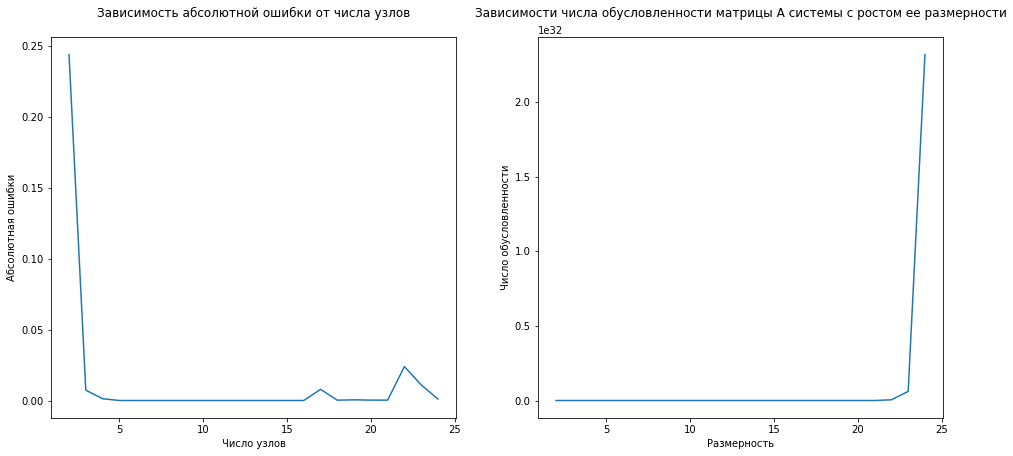

In [8]:
%pylab inline
#рисуем графики
plt.figure(figsize(16,7))
plt.subplot(121)
plt.plot(n_knot,abs_error)
plt.title("Зависимость абсолютной ошибки от числа узлов", pad = 20)
plt.xlabel('Число узлов')
plt.ylabel('Абсолютная ошибки')
plt.subplot(122)
plt.plot(dimension,conditioning)
plt.title("Зависимости числа обусловленности матрицы A системы с ростом ее размерности", pad = 20)
plt.xlabel('Размерность')
plt.ylabel('Число обусловленности')
plt.show()

### Требуемые графики тяжело анализировать, поэтому я построил доп. графики в логорифмическом масштабе

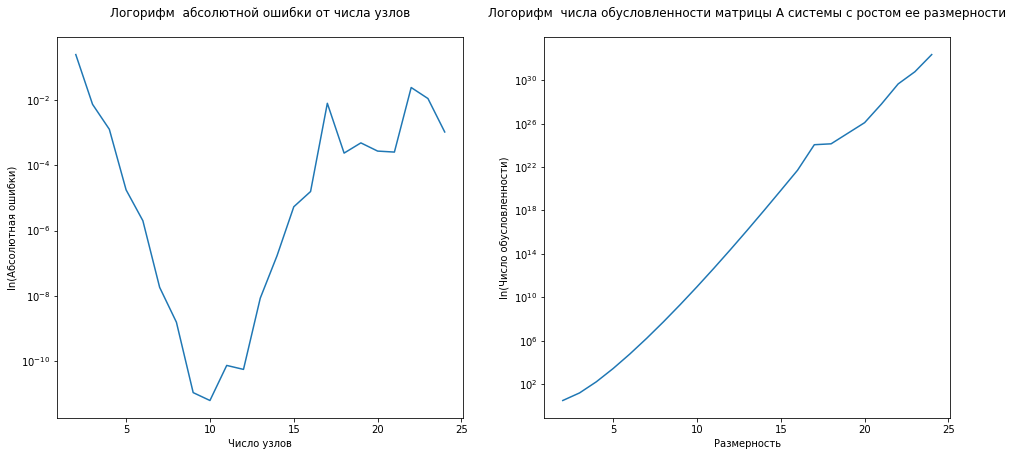

In [9]:
#рисуем логорифмические графики
plt.figure(figsize(16,7))
plt.subplot(121)
plt.yscale('log')
plt.plot(n_knot,abs_error)
plt.title("Логорифм  абсолютной ошибки от числа узлов", pad = 20)
plt.xlabel('Число узлов')
plt.ylabel('ln(Абсолютная ошибки)')
plt.subplot(122)
plt.yscale('log')
plt.plot(dimension,conditioning)
plt.title("Логорифм  числа обусловленности матрицы A системы с ростом ее размерности", pad = 20)
plt.xlabel('Размерность')
plt.ylabel('ln(Число обусловленности)')
plt.show()

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

In [42]:
def find_p(h):
    direction_p_1 = abs(np.cos(a) - (np.sin(a+h) -np.sin(a))/h)
    direction_p_2 = abs(np.cos(a) - (np.sin(a+h/2) -np.sin(a))/(h/2))
    p_1 = np.log2(direction_p_1/direction_p_2)
    center_p_1 = abs(np.cos(a) - (np.sin(a+h) -np.sin(a-h))/(2*h))
    center_p_2 = abs(np.cos(a) - (np.sin(a+h/2) -np.sin(a-h/2))/h)
    p_2 = np.log2(center_p_1/center_p_2)
    return p_1, p_2
H_range  = 100000
h_start = 0.001
list_h   = list()
direct_p = list()
center_p = list()
for i in range(H_range):
    j = h_start + np.random.normal(loc = 0.005, scale = 0.005)
    h_start = j
    list_h.append(j)
    temp = find_p(j)
    direct_p.append(temp[0])
    center_p.append(temp[1])


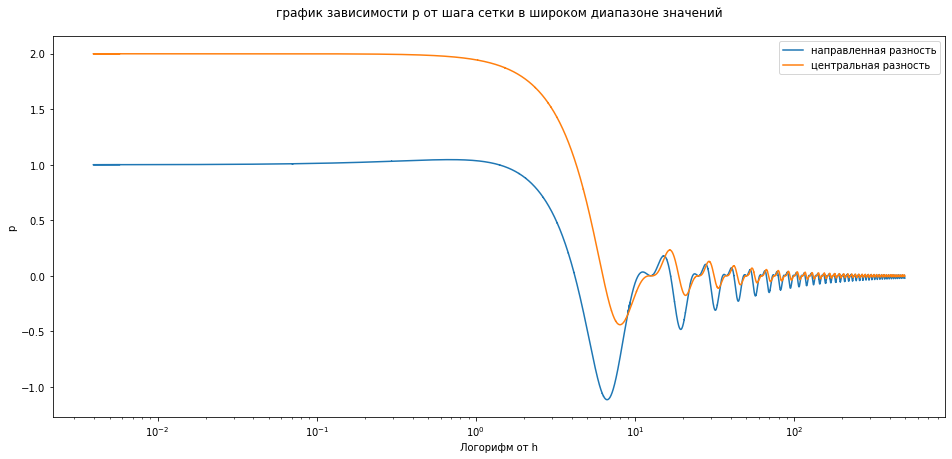

In [43]:
#рисуем
plt.plot(list_h,direct_p, label = 'направленная разность')
plt.plot(list_h,center_p, label = 'центральная разность')
plt.xlabel('Логорифм от h')
plt.ylabel('p')
plt.xscale('log')
plt.title("график зависимости p от шага сетки в широком диапазоне значений", pad = 20)
plt.legend()

Участок графиков, где $ p = CONST$  соответсвует облости применимости нашей формулы, где $ \frac{C}{C_1} \approx 1$

После участка применимости формулы $\epsilon_{h}$ не зависит от h, поэтому $ p \approx 0$

## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [12]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000